# Process Points Layer with napari-clusters-plotter
This notebook shows how to add and change the visualization of napari [Points layer](https://napari.org/stable/api/napari.layers.Points.html). It also open napari-clusters-plotter Plotter.

In [1]:
import napari
from napari.utils import nbscreenshot
import numpy as np
import pandas as pd
from napari_clusters_plotter._plotter import PlotterWidget

## Create some points data

In [2]:
x_coords = np.random.randint(low=0, high=10, size=50)
y_coords = np.random.randint(low=0, high=10, size=50)
z_coords = np.linspace(start=0, stop=50)

points_data = np.array([z_coords, y_coords, x_coords]).T

## Create some features

In [3]:
# Made-up features
temperature = z_coords**2
pressure = np.exp(z_coords/10)
iron_melts = temperature > 1538

features = {'x_coords': x_coords,
            'y_coords': y_coords,
            'z_coords': z_coords,
            'temperature': temperature,
            'pressure': pressure,
            'iron_melts': iron_melts}
features = pd.DataFrame(features)

## Add points to viewer

In [4]:
viewer = napari.Viewer()
viewer.add_points(points_data, size=1, features = features)
viewer.dims.ndisplay = 3 # turn on 3D view

## Other examples of display based on features

Add points layer with feature encoded as a colormap

In [5]:
viewer.add_points(points_data, size=1, features = features, face_colormap='plasma', face_color='temperature')

<Points layer 'points_data [1]' at 0x1320dee4d30>

Add points layer with category encoded as a colorcycle

In [6]:
viewer.add_points(points_data, size=1, features = features, face_color_cycle=['cyan', 'orange'], face_color='iron_melts')

<Points layer 'points_data [2]' at 0x1320c7d4f70>

## Open clusters-plotter Plotter

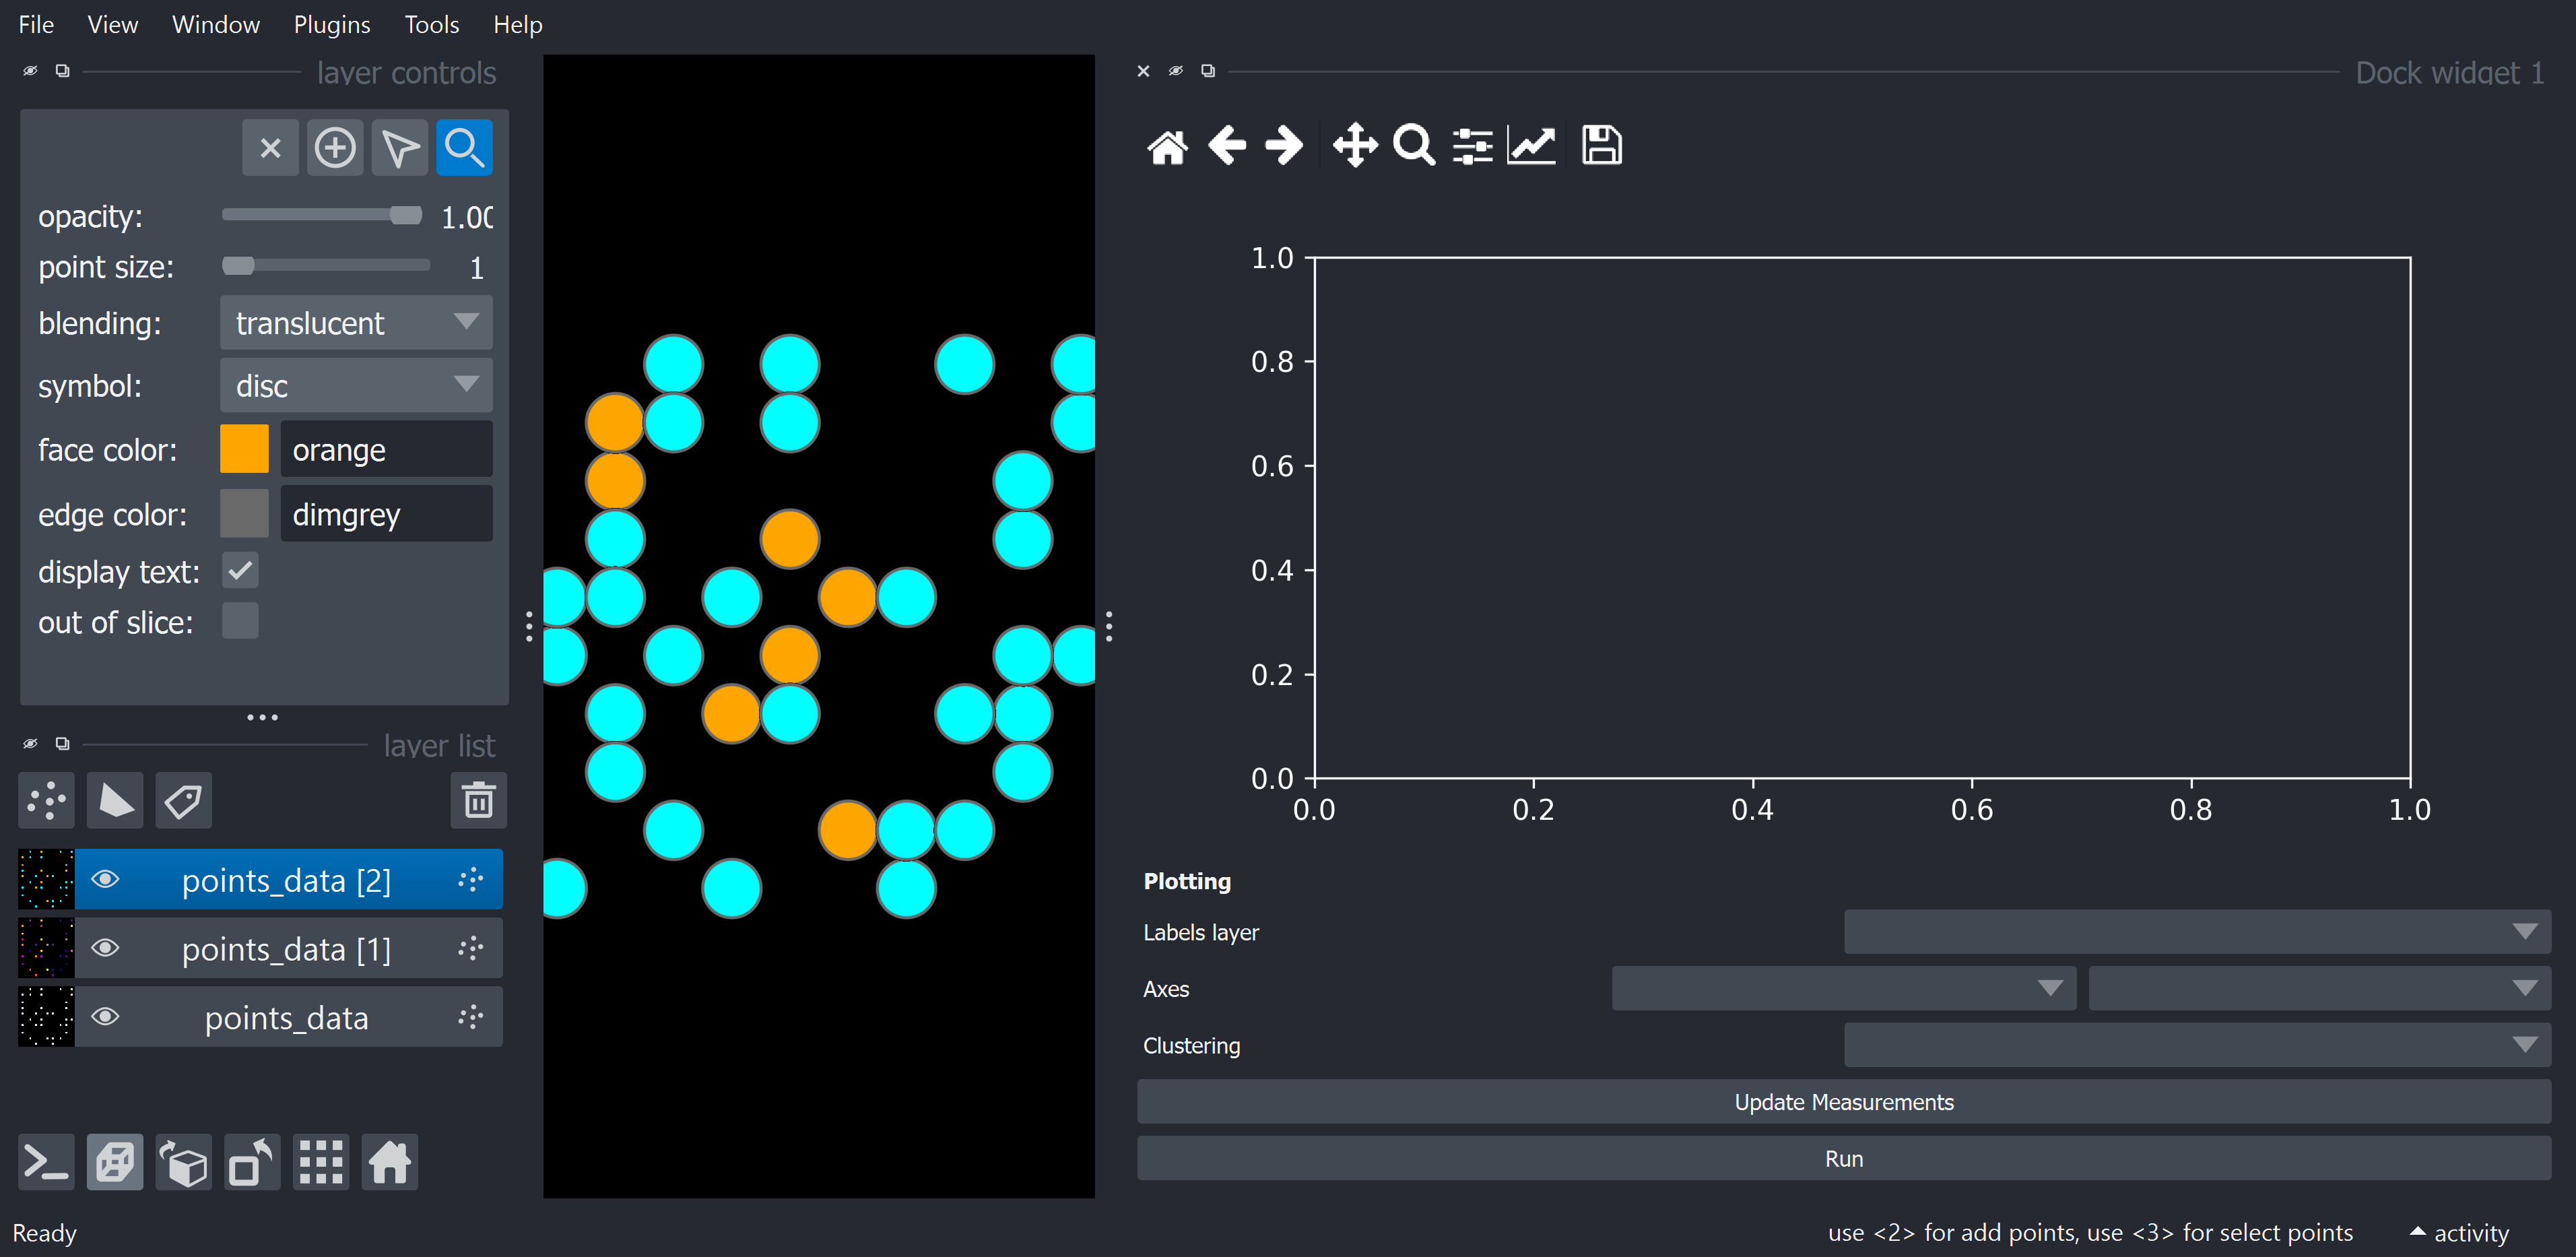

c:\Users\mazo260d\mambaforge\envs\napari-flim-dev\lib\site-packages\napari_clusters_plotter\_plotter.py:161: UserWarning: Please select labels layer!
  warnings.warn("Please select labels layer!")


In [7]:
widget = PlotterWidget(viewer)
viewer.window.add_dock_widget(widget)
nbscreenshot(viewer)

Plotter should be able to read points data and plot them.